# Customer Churn Prediction with Python

In [22]:
path=(r"C:\Users\war machine rocks\Downloads\Churn_Modelling.csv")

In [115]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
customer_data=pd.read_csv(path)

In [43]:
customer_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [44]:
customer_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

* RowNumber—corresponds to the record (row) number and has no effect on the output. This column will be removed.

* CustomerId—contains random values and has no effect on customer leaving the bank. This column will be removed.

* Surname—the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

* Geography—a customer's location can affect their decision to leave the bank. We'll keep this column.

* Gender—it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.

* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

* NumOfProducts—refers to the number of products that a customer has purchased through the bank.

* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

* IsActiveMember—active customers are less likely to leave the bank, so we'll keep this.

* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

* Exited—whether or not the customer left the bank. This is what we have to predict.


In [130]:
dataset=customer_data.drop(['RowNumber','CustomerId', 'Surname'],axis=1)
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [131]:
encoder = LabelEncoder()
dataset['gender'] = encoder.fit_transform(dataset['Geography'])
dataset['geography'] = encoder.fit_transform(dataset['Gender'])

In [135]:
dataset.drop(['Geography','Gender'],axis=1,inplace=True)

In [136]:
customer_data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [137]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0)

In [140]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.866


<Axes: >

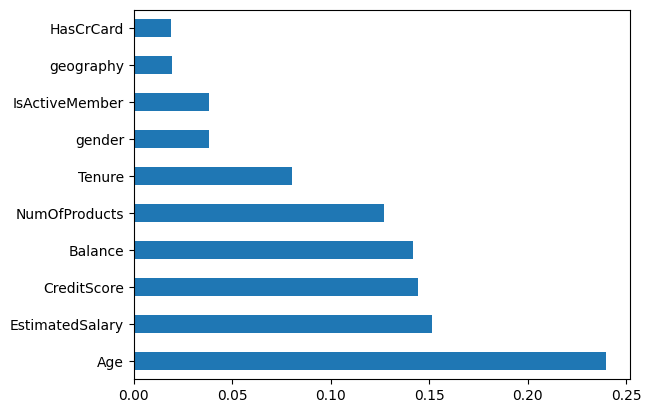

In [142]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')